# Cointegrated VAR and VECM

Our starting point is a system of cointegrated variables which in a trading context indicates a set of similar stocks that are likely to be driven by the smae fundamentals.

## The Standard VAR Models

Can only be estimated when the variables are **stationary**.

### Conventional Way of Removing Unit Root

is done by **differenciating** the series using first differences. However, in the case of cointegrated series, this would lead to overdifferenciating and losing information conveyed by the long-term co-movement of variable levels. 

**Goal:** To build a model of stationary variables, which also incorporates the long-term relationship between the original cointegrating non-stationary variables $\Rightarrow$ to build a **Cointegrated VAR Model**.

## Vector Error Correction Models

- A VECM consists of:
    1. a VAR model of order $p - 1$ on the **Differences of the Variables**.

    2. An **Error-Correction term** derived from the knows (estimated) cointegrating relationship.


- A VECM Model establishes a:

    **1. Short-Term:** Relationship between stock returns, i.e. the differences of the variables

    **2. Long-Term:** while correcting with the deviation from the long-term co-movement of prices.

<b></b>   
$VECM(p)$, $k=2$: 

<p style="text-align:center;"> $\Delta y_t = \alpha \beta' y_{t_1} + \psi_1 \Delta y_{t-1} + ... + \psi_1 \Delta y_{t-p+1} + \epsilon$ </p>

$\alpha \beta'$ are the cointegrating relationships

### Two-Variable VECM

The **Engle-Granger** method is used

### Multivariate VECM

The maximum number of cointegrating relationships is $n-1$ we follow the Johanses Procedure

# Practical Example:

Data Source: FRED

Data: 

- 3-month T-bill secondary market rates

- 6-month T-bill secondary market rates

Period: 1984 - 2014

## Procedure:

## 1. Test for Unit Root Process

- Augmented Dicky Fuller Test on the series (to support the results of plotting the series)

## 2. Obtain the Cointegrating Relationship and Test for Cointegration

- Construct a linear combination of the two variables: $z_t = x_t \beta $

- Perform a Phillips and Ouliaris Test on two variables (merged/cbind) to test for cointegration

## 3. Implement the Johansen Procedure

- Find the number of cointegrating relationships

## 4. Obtain the VECM Representation of this System

- Run an OLS regression on the lagged differenced variables and the error correction term 


[1] "DTB3"

[1] "DTB6"

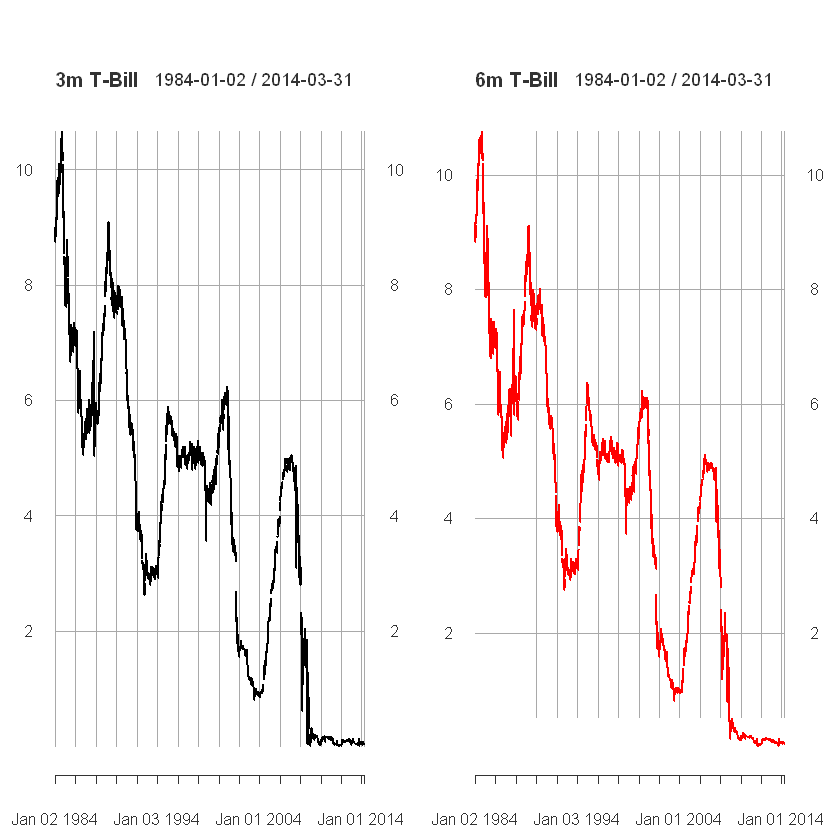

In [76]:
library("quantmod")
library("tseries")
library("urca")

getSymbols("DTB3", src="FRED")
getSymbols("DTB6", src ="FRED")

# Subset the data
DTB3.sub <- DTB3["1984-01-02/2014-03-31"]
DTB6.sub <-DTB6["1984-01-02/2014-03-31"]

# Plot the data
par(mfrow=c(1,2))
plot(DTB3.sub, type = "l", main = "3m T-Bill ")
plot(DTB6.sub, col="red", main = "6m T-Bill")

## 1. Augemented Dickey Fuller Test for Detecting Unit Root

We perform a standard ADF test on both the 3-month and 6-month interest rates to check for non-stationarity.

<p style="text-align:center;"> $H_0: \text{Non-Stationarity}$ </p>
<p style="text-align:center;"> $H_1: \text{Stationarity}$ </p>

In [77]:
DTB3.sub <- na.omit(DTB3.sub)
adf.test(DTB3.sub)

DTB6.sub <- na.omit(DTB6.sub)
adf.test(DTB6.sub)


	Augmented Dickey-Fuller Test

data:  DTB3.sub
Dickey-Fuller = -2.0199, Lag order = 19, p-value = 0.5699
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  DTB6.sub
Dickey-Fuller = -2.0708, Lag order = 19, p-value = 0.5484
alternative hypothesis: stationary


The test does not reject the null of non-stationarity, as suggested also by the above plots, so we can conclude that both the 3-month T-bill and 6-month T-bill are non-stationary processes. 

## 2. Cointegrating Relationships and Cointegration Tests

We can consistently estimate the cointegrating relationship between two series by running a simple linear regression.z
<p style="text-align:center;"> $z_t = x_t \beta $ </p>

In [57]:
# Bind the two interest rates into a single dataframe
US_int_rates <- cbind(DTB3.sub, DTB6.sub)

# Estimate and obtain the residuals of the cointegrating regression
cointegrating_regression <- lm(DTB3.sub ~ DTB6.sub)
residuals <- cointegrating_regression$residuals

We can test for cointegration if the **residuals** of the regression, i.e. $z_t = x_t \beta $ that is the linear combination of the variables $\sim$ stationaty:

**1. ADF Test:** but in these settings the conventional critical values are *not appropriate*

**2. Phillips and Ouliaris Test:** to correct the values for the presence of cointegrating relationships

### Phillips and Ouliaris Test

<p style="text-align:center;"> $H_0: \text{No Cointegration}$ </p>
<p style="text-align:center;"> $H_1: \text{Presence of Cointegrating Relationships}$ </p>

In [53]:
## Implement the Phillips and Ouliaris Test

po.test(US_int_rates, demean=TRUE, lshort=TRUE)

Warning message in po.test(US_int_rates, demean = TRUE, lshort = TRUE):
"p-value smaller than printed p-value"


	Phillips-Ouliaris Cointegration Test

data:  US_int_rates
Phillips-Ouliaris demeaned = -250.55, Truncation lag parameter = 75,
p-value = 0.01


The resulting p-value rejects the null of no cointegration, therefore we can conclude that the variables have a cointegrating relationship.

## 3. Determining the Number of Cointegrating Relationships

We apply the Johansen procedure to uncover the number of cointegrating relationships between $0$ and $n$.

In [71]:
# K in the number of relationships we want to test
US_int_rates.VECM <- ca.jo(US_int_rates, type = "trace", ecdet="none", K = 2)
summary(US_int_rates.VECM)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.0160358123 0.0002322675

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 1 |   1.76  6.50  8.18 11.65
r = 0  | 123.99 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           DTB3.l2   DTB6.l2
DTB3.l2  1.0000000  1.000000
DTB6.l2 -0.9943889 -7.753704

Weights W:
(This is the loading matrix)

            DTB3.l2      DTB6.l2
DTB3.d -0.037040262 3.124862e-05
DTB6.d -0.007337216 4.203585e-05


**Results:**

- $r = 0$ we reject the null 

- $r \leq 1$ we do not reject $\Rightarrow$ we have one cointegrating relationship

**The Cointegrating Vector:**

is given by the first column of the normalized eigenvectors (below the test)

## 4. Obtain the VECM Representation of this System

Run an OLS regression on the lagged differenced variables and the error correction term including the cointegration rank $r$.

**The Error Correction Term:** is derived from the previously calculated cointegrating relationship, i.e. $z_t = x_t \beta $

In [73]:
US_int_rates.VECM.rls <- cajorls(US_int_rates.VECM, r=1)
US_int_rates.VECM.rls

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
          DTB3.d     DTB6.d   
ect1      -0.037040  -0.007337
constant  -0.004196  -0.001691
DTB3.dl1   0.091770   0.147683
DTB6.dl1   0.036983  -0.032574


$beta
              ect1
DTB3.l2  1.0000000
DTB6.l2 -0.9943889


**Results:**

The coefficient of the **error correction term is negative** (i.e. DTB6.l2) which is what we expected:

- A **short-term** deviation from the **long-term** equilibrium level would push our variables back to the **zero-equilibrium** deviation.

## Check for the Bivariate Case following the Engle-Granger Procedure

The result of the Johansen procedure method leads to approximately the same result as the step-by-step implementation of the ECM following the Engle-Granger procedure.

1. Run a linear regression $y_t$ on $x_t$ (a simple OLS estimation) which gives us our linear combination of variables, i.e. the cointegrating relationship

2. Test the residuals for the presence of a unit root, i.e. that the cointegrating relationship is stationary

<p style="text-align:center;"> $H_0: \text{Non-Stationarity}$ </p>
<p style="text-align:center;"> $H_1: \text{Stationarity}$ </p>

In [82]:
lin_regression <- lm(as.numeric(DTB3.sub$DTB3) ~ as.numeric(DTB6.sub$DTB6)) # regression without intercept
summary(ur.df(lin_regression$resid))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55884 -0.01298  0.00098  0.01277  0.47866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.029940   0.002856 -10.484   <2e-16 ***
z.diff.lag -0.029021   0.011497  -2.524   0.0116 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03611 on 7559 degrees of freedom
Multiple R-squared:  0.01624,	Adjusted R-squared:  0.01598 
F-statistic:  62.4 on 2 and 7559 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.4841 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


As we can see, we reject the null of non-stationarity, implying that the linear combination of DTB3 and DTB6 is stationary, that is, they have a cointegrating relationship.